<a href="https://colab.research.google.com/github/MedAmineBayoudha/TinyML/blob/main/Gesture%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***READ .txt FILES :***

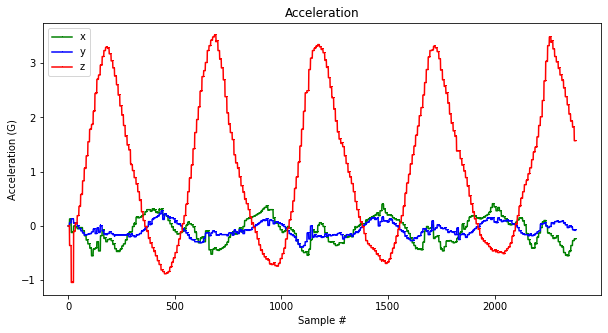

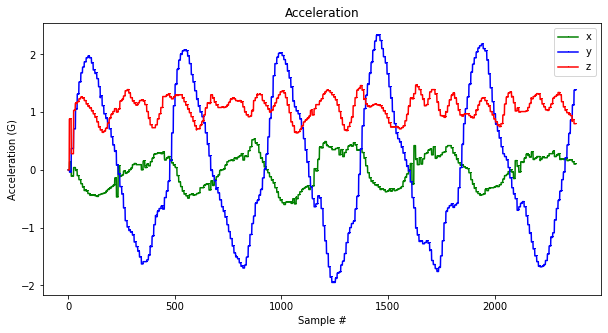

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
filename = "UPDOWN.txt"
filename1 = "RIGHTLEFT.txt"
filename2 = "Idle.txt"


df = pd.read_csv('/content/' + filename) 
df1 = pd.read_csv('/content/' + filename1) 
df2 = pd.read_csv('/content/' + filename2) 

index = range(1, len(df['Ax']) + 1)

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(index, df['Ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['Ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['Az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df1['Ax'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df1['Ay'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df1['Az'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

**CLUSTERS OF ACTUAL DATA'S DISTRIBUTION**

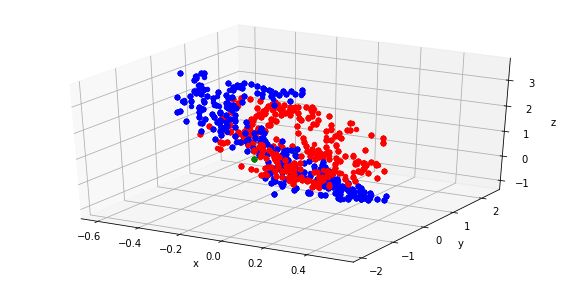

In [2]:
# Function to plot 3D scatterplot of normal and anomaly smaples
def plotScatterSamples( df, df1, df2, num_samples, title=''):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(num_samples):
        ax.scatter(df['Ax'][i], df['Ay'][i], df['Az'][i], c='b')
        ax.scatter(df1['Ax'][i], df1['Ay'][i], df1['Az'][i], c='r')
        ax.scatter(df2['Ax'][i], df2['Ay'][i], df2['Az'][i], c='g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
# Plot time series of accelerometer data
plotScatterSamples( df, df1, df2, 2000 )    

***DIVIDE DATA 20 recordings for each case***


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
# "Reproducibility" means the ability to run the same thing twice and get 
#the same results.

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "RIGHTLEFT",
    "UPDOWN",
    "Idle"
]

SAMPLES_PER_GESTURE = 119

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

tensorAx = []
tensorAy = []
tensorAz = []

tensor1Ax = []
tensor1Ay = []
tensor1Az = []

tensor2Ax = []
tensor2Ay = []
tensor2Az = []

MADTensorAx = []
MADTensorAy = []
MADTensorAz = []

MADTensor1Ax = []
MADTensor1Ay = []
MADTensor1Az = []

MADTensor2Ax = []
MADTensor2Ay = []
MADTensor2Az = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_GESTURES[gesture_index]
  
  df = pd.read_csv("/content/" + gesture + ".txt")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      tensor += [
          df['Ax'][index],
          df['Ay'][index],
          df['Az'][index]
      ]
      if ( gesture == "RIGHTLEFT" ):  
          tensorAx += [df['Ax'][index]]
          tensorAy += [df['Ay'][index]]
          tensorAz += [df['Az'][index]]
      elif ( gesture == "UPDOWN" ):
          tensor1Ax += [df['Ax'][index]]
          tensor1Ay += [df['Ay'][index]]
          tensor1Az += [df['Az'][index]] 
      elif ( gesture == "Idle" ):
          tensor2Ax += [df['Ax'][index]]
          tensor2Ay += [df['Ay'][index]]
          tensor2Az += [df['Az'][index]]    
    if ( gesture == "RIGHTLEFT" ):  
          MADTensorAx.append(stats.median_absolute_deviation(tensorAx))
          MADTensorAy.append(stats.median_absolute_deviation(tensorAy))
          MADTensorAz.append(stats.median_absolute_deviation(tensorAz))
    elif ( gesture == "UPDOWN" ):
          MADTensor1Ax.append(stats.median_absolute_deviation(tensor1Ax))
          MADTensor1Ay.append(stats.median_absolute_deviation(tensor1Ay))
          MADTensor1Az.append(stats.median_absolute_deviation(tensor1Az))
    elif ( gesture == "Idle"):
          MADTensor2Ax.append(stats.median_absolute_deviation(tensor2Ax))
          MADTensor2Ay.append(stats.median_absolute_deviation(tensor2Ay))
          MADTensor2Az.append(stats.median_absolute_deviation(tensor2Az))                  
    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array

inputs = np.array(inputs)
outputs = np.array(outputs)
print("Data set parsing and preparation complete.")



TensorFlow version = 2.9.2

Processing index 0 for gesture 'RIGHTLEFT'.
	There are 20 recordings of the RIGHTLEFT gesture.
Processing index 1 for gesture 'UPDOWN'.
	There are 20 recordings of the UPDOWN gesture.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: DeprecationWarning: `median_absolute_de

Processing index 2 for gesture 'Idle'.
	There are 20 recordings of the Idle gesture.
Data set parsing and preparation complete.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: DeprecationWarning: `median_absolute

**CLUSTERS OF MAD'S DISTRIBUTION**

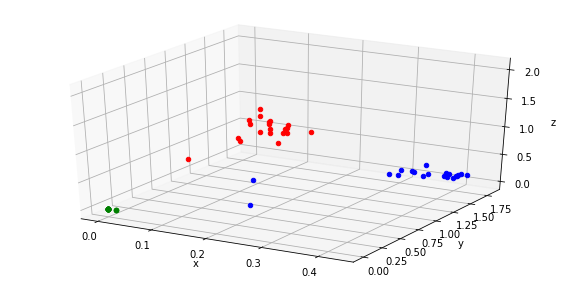

In [4]:
# Function to plot 3D scatterplot of normal and anomaly smaples
def plotScatterSamples1(MADTensorAx, MADTensorAy, MADTensorAz, 
                        MADTensor1Ax, MADTensor1Ay, MADTensor1Az,
                        MADTensor2Ax, MADTensor2Ay, MADTensor2Az,
                        num_samples,title=''):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(num_samples):
        ax.scatter(MADTensorAx[i], MADTensorAy[i], MADTensorAz[i], c='b')
        ax.scatter(MADTensor1Ax[i], MADTensor1Ay[i], MADTensor1Az[i], c='r')
        ax.scatter(MADTensor2Ax[i], MADTensor2Ay[i], MADTensor2Az[i], c='g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)
# Plot time series of accelerometer data
plotScatterSamples1(MADTensorAx, MADTensorAy, MADTensorAz, MADTensor1Ax, MADTensor1Ay, MADTensor1Az,
                    MADTensor2Ax, MADTensor2Ay, MADTensor2Az,20) 

**REARRANGING DATA**

In [5]:
tensor = []
inputs = []
outputs = []
for i in range(num_recordings):
   inputs.append([MADTensorAx[i],MADTensorAy[i],MADTensorAz[i]])
   outputs.append([1.0,0.0,0.0]) 
for i in range(num_recordings):
   inputs.append([MADTensor1Ax[i],MADTensor1Ay[i],MADTensor1Az[i]] )
   outputs.append([0.0,1.0,0.0])
for i in range(num_recordings):
   inputs.append([MADTensor2Ax[i],MADTensor2Ay[i],MADTensor2Az[i]] )
   outputs.append([0.0,0.0,1.0])
inputs = np.array(inputs)
outputs = np.array(outputs)

**RANDOMIZE AND SPLIT DATA**

In [6]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])
print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


**TRAIN MODEL**

In [7]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(6, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/600
36/36 [==============================] - 1s 11ms/step - loss: 0.2010 - mae: 0.4186 - val_loss: 0.1727 - val_mae: 0.3862
Epoch 2/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1858 - mae: 0.4015 - val_loss: 0.1603 - val_mae: 0.3711
Epoch 3/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1741 - mae: 0.3877 - val_loss: 0.1476 - val_mae: 0.3543
Epoch 4/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1622 - mae: 0.3724 - val_loss: 0.1348 - val_mae: 0.3364
Epoch 5/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1496 - mae: 0.3553 - val_loss: 0.1217 - val_mae: 0.3165
Epoch 6/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1376 - mae: 0.3377 - val_loss: 0.1091 - val_mae: 0.2956
Epoch 7/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1262 - mae: 0.3190 - val_loss: 0.0978 - val_mae: 0.2749
Epoch 8/600
36/36 [==============================] - 0s 3ms/step - loss: 0.1154 - 

In [93]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (1, 10)                   40        
                                                                 
 dense_34 (Dense)            (1, 6)                    66        
                                                                 
 dense_35 (Dense)            (1, 3)                    21        
                                                                 
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


**SHOW TRAINING RESULTS : ERRORS PLOTS AND SOME INFERENCE EXAMPLES**

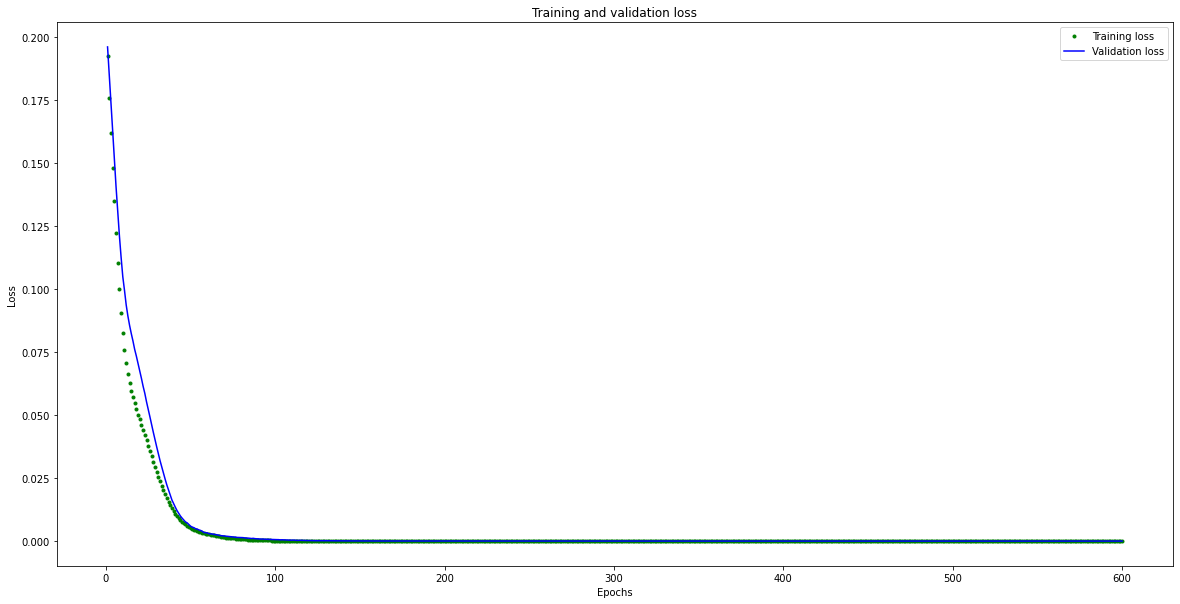

[20.0, 10.0]


In [94]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

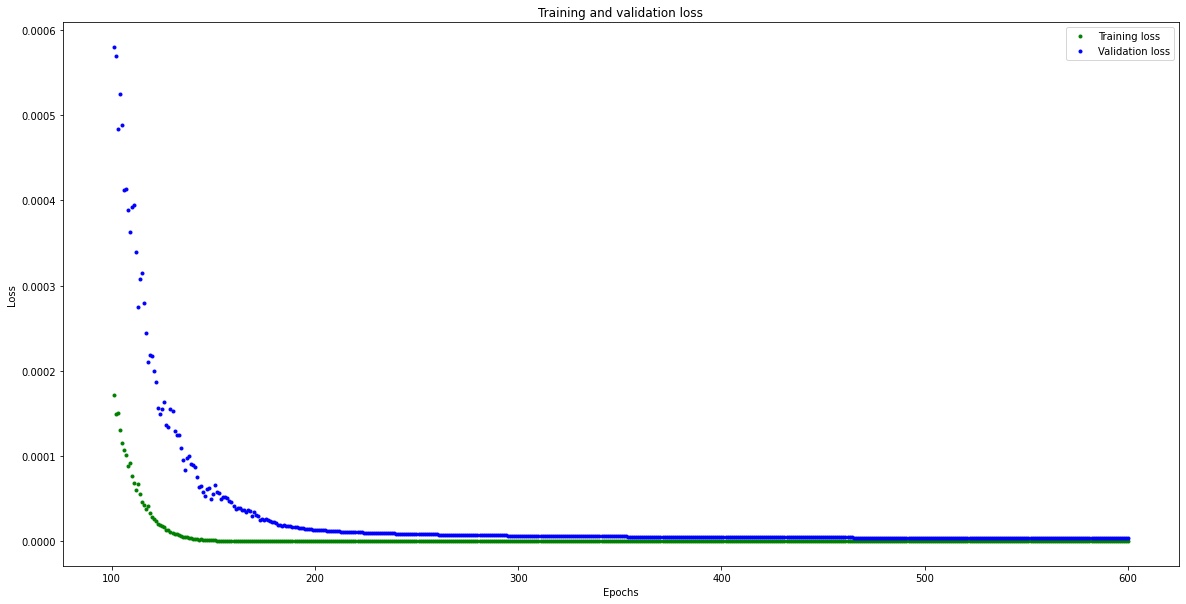

In [95]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

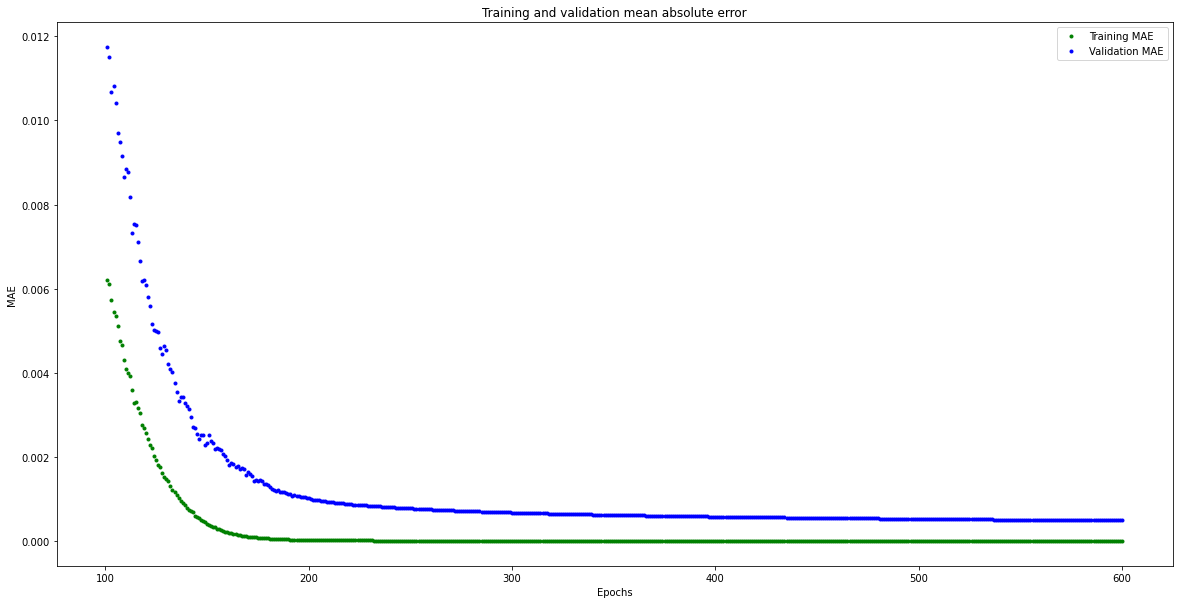

In [96]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

1/1 [==============================] - 0s 14ms/step
predictions =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
actual =
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


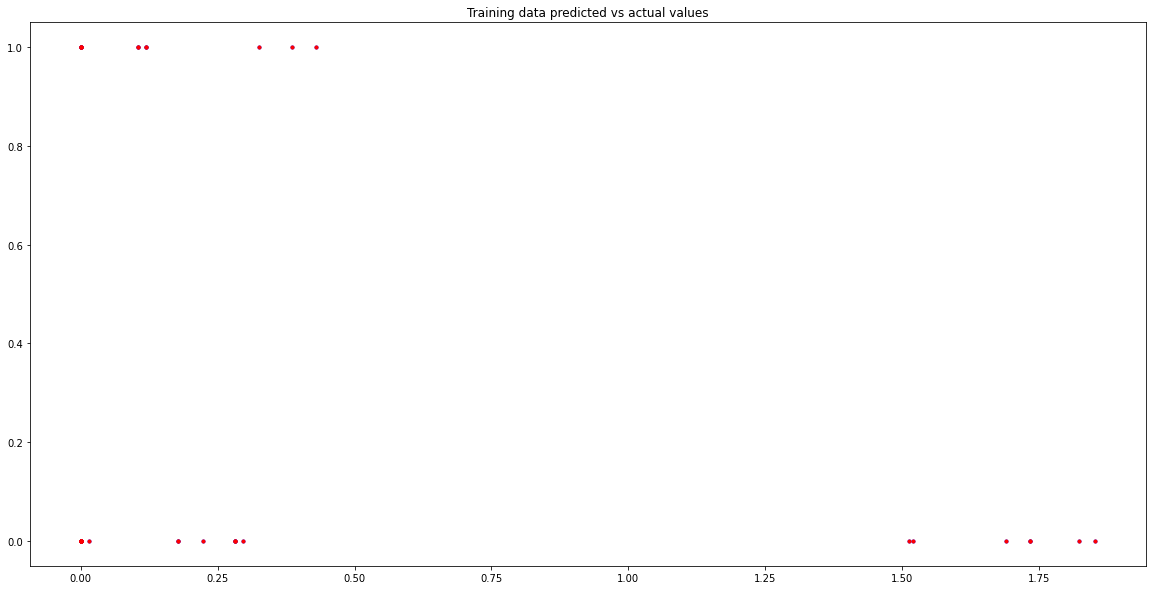

In [98]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

**CONVERTING MODEL CREATED AND TRAINED INTO TF.LITE MODEL THEN .H MODEL**

In [99]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 2628 bytes


In [100]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 16,240 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
